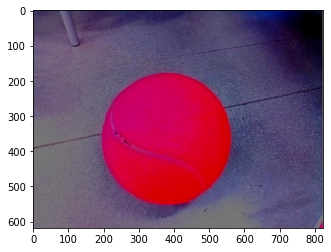

image height:  618
image width:  824


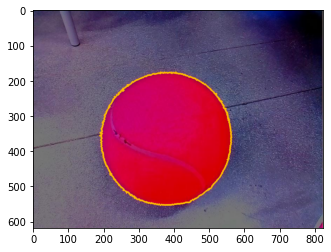

bounding rect width: 376
bounding rect height: 378
object distance (ft):  1.0599091780194143


'\'\'\nb_lower = np.array([1, 1, 120])\nb_upper = np.array([204, 204, 255])\nb_mask = cv2.inRange(img, b_lower, b_upper)\nplt.imshow(b_mask, cmap="gray")\nplt.show()\n'

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

DIST_FROM_CAM = 31.75#15.356 #cm

def find_largest_contour(contours):
  largest = max(contours, key = cv2.contourArea)
  return largest

# img_height & img_obj_height is in pixels; obj_height in cm
def find_obj_dist(img_height, img_obj_height, obj_height):
  f_cm = img_height / (27.94 / DIST_FROM_CAM)
  dist = obj_height * f_cm / img_obj_height
  return dist

def find_obj_dist1(img_height, a, b):
  return 13.39*24.13/(a*2.54/96)

def linear_reg(img_ball_h):
  arr = #input data here 
    #img ball height, distance, focal length
  model = LinearRegression().fit(arr[:,0], arr[:,2])
  focal_pred = model.predict(img_ball_h)
  return focal_pred

# show original image
img = cv2.imread("img1.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

# get image height and width
img_h, img_w, channels = img.shape
print("image height: ", img_h)
print("image width: ", img_w)


# create red ball mask + get contours
r_lower = np.array([138,0,0])
r_upper = np.array([255, 163, 163])
r_mask = cv2.inRange(img, r_lower, r_upper)
contours, hiearchy = cv2.findContours(r_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
plt.imshow(cv2.drawContours(img.copy(), [find_largest_contour(contours)], -1, (252, 186, 3), 3), cmap="gray")
plt.show()

# find largest contour + coordinates and dim of bounding rect
largest_contour = find_largest_contour(contours)
x,y,rect_w,rect_h = cv2.boundingRect(largest_contour)
print("bounding rect width:", rect_w)
print("bounding rect height:", rect_h)

obj_dist = (find_obj_dist1(img_h, rect_h, 24.13)) / 30.48
print("object distance (ft): ", obj_dist)


'''''
b_lower = np.array([1, 1, 120])
b_upper = np.array([204, 204, 255])
b_mask = cv2.inRange(img, b_lower, b_upper)
plt.imshow(b_mask, cmap="gray")
plt.show()
'''''